In [15]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("license_train", {}, "/home/nicholas/Desktop/labels_all.json", "/home/nicholas/Downloads/images")

In [3]:
license_train_metadata = MetadataCatalog.get("license_train")
dataset_dicts_train = DatasetCatalog.get("license_train")

WARNING [06/19 15:24:54 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/19 15:24:54 d2.data.datasets.coco]: Loaded 433 images in COCO format from /home/nicholas/Desktop/labels_all.json


In [4]:
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("license_train")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 30
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.DEVICE = "cpu" # i have a nvidia GPU, might be an virtualbox problem

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/19 15:24:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [06/19 15:24:54 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/19 15:24:54 d2.data.datasets.coco]: Loaded 433 images in COCO format from /home/nicholas/Desktop/labels_all.json
[06/19 15:24:54 d2.data.build]: Removed 0 images with no usable annotations. 433 images left.
[06/19 15:24:54 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  LICENSE   | 433          |
|            |              |
[06/19 15:24:54 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[06/19 15:24:54 d2.data.build]: Using training sampler TrainingSampler
[06/19 15:24:54 d2.data.common]: Serializing 433 elements to byte tensors and concatenating them all ...
[06/19 15:24:54 d2.data.common]: Serialized dataset takes 0.1

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[06/19 15:24:55 d2.engine.train_loop]: Starting training from iteration 0


/home/nicholas/miniconda3/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.
/home/nicholas/miniconda3/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811757271/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/19 15:33:41 d2.utils.events]:  eta: 0:04:26  iter: 19  total_loss: 1.087  loss_cls: 0.2426  loss_box_reg: 0.2164  loss_mask: 0.342  loss_rpn_cls: 0.01655  loss_rpn_loc: 0.006922  time: 26.3817  data_time: 0.0160  lr: 0.012674  
[06/19 15:37:59 d2.utils.events]:  eta: 0:00:00  iter: 29  total_loss: 0.6386  loss_cls: 0.08845  loss_box_reg: 0.203  loss_mask: 0.2731  loss_rpn_cls: 0.01511  loss_rpn_loc: 0.009548  time: 26.1920  data_time: 0.0068  lr: 0.019334  
[06/19 15:37:59 d2.engine.hooks]: Overall training speed: 28 iterations in 0:12:13 (26.1920 s / it)
[06/19 15:37:59 d2.engine.hooks]: Total training time: 0:12:13 (0:00:00 on hooks)


In [18]:
plt.rcParams["figure.figsize"] = (15, 15)

In [13]:
from detectron2.utils.visualizer import ColorMode
def visualizeImage(results):
    v = Visualizer(im[:, :, ::-1],
                  metadata=license_train_metadata,
                  scale=1.0
    )
    v = v.draw_instance_predictions(results.to("cpu"))
    plt.subplot(), plt.imshow(v.get_image()[:, :, ::-1])
    plt.xticks([]), plt.yticks([])
    plt.show()

In [10]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.DATASETS.TEST = ()
predictor = DefaultPredictor(cfg)

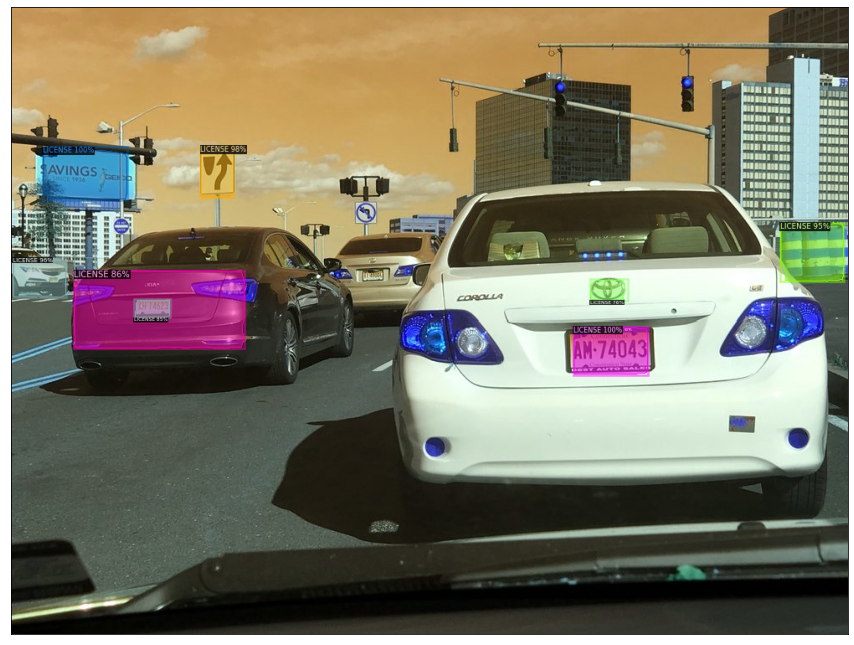

In [19]:
path = ["/home/nicholas/Desktop/test.jpg"]
for file in path:
    im = cv2.imread(file)
    outputs = predictor(im)
    visualizeImage(outputs["instances"])